# A/B-тест  <a class="tocSkip">

Отдел аналитики крупного интернет-магазина подготовил список гипотез для увеличения выручки.

Необходимо:
* Приоритизировать гипотезы;
* Запустить A/B-тест;
* Проанализировать результаты.
    
Файл1 содержит:
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
    
Файл2 содержит:
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.
    
Файл3 содержит:
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста
    

## Навигация <a id="navigation"></a>

[Приоритизация гипотез.](#opening)
  * [Выгрузка данных и анализ общей информации.](#info)
  * [Вывод.](#openingsum)
  * [ICE и RICE](#icerice)
  * [Вывод.](#icericesum)
 

[Анализ A/B-теста](#abtest)
  * [Построение графиков](#graphs)
    * [График кумулятивной выручки и кумулятивного среднего чека по группам](#cumcost)
    * [График кумулятивного среднего чека по группам](#cummeancost)
    * [Вывод по графикам кумулятивной выручки и кумулятивного среднего чека по группам](#cumcostmean)
    * [График относительного изменения кумулятивного среднего чека группы B к группе A](#cumcostrel)
    * [Вывод по графику относительного изменения кумулятивного среднего чека группы B к группе A](#cumsum)
    * [График кумулятивной конверсии и ее относительного изменения по группам](#cumcon)
    * [График относительного изменения кумулятивной конверсии группы B к группе A](#cumconrel)
    * [Вывод по графику кумулятивной конверсии и ее относительного изменения по группам](#cumconsum)
  * [Определение границы выбросов](#blowouts)
    * [Точечный график количества заказов по пользователям, 95-й и 99-й перцентили. Выбор границы определения аномальных пользователей](#blowoutscount)
    * [Точечный график стоимостей заказов, 95-й и 99-й перцентили. Выбор границы определения аномальных заказов](#blowoutscost)
    * [Вывод: аномальная граница количества заказов и стоимости](#blowoutssum)
  * [Сравнение различий](#means)
    * [Сравнение различий в конверсии и среднем чеке между группами по «сырым» данным](#meanscon)
    * [Сравнение различий в среднем чеке заказа между группами по «сырым» данным](#meanscost)
    * [Вывод - сравнение различий в конверсии и среднем чеке между группами по «сырым» данным](#meansrawsum)
    * [Сравнение различий в конверсии и среднем чеке между группами по «очищенным» данным](#meansclean)
    * [Вывод - сравнение различий в конверсии и среднем чеке между группами по «очищенным» данным](#meanscleansum)


[Общий вывод](#bigsum)

# Приоритизация гипотез <a id="opening"></a>

## Выгрузка данных и анализ общей информации <a id="info"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import scipy.stats as stats
import numpy as np 
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [7]:
hypothesis = pd.read_csv('')
visitors = pd.read_csv('', sep= ',')
orders = pd.read_csv('')

datalist= [hypothesis, visitors, orders]
for i in datalist:
    display(i.info())
    display(i.head(5))
    display(i.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


0

Проверка вхождений пользователей в две и больше групп теста. 

In [22]:
(orders.pivot_table(index='visitorId', values='group', aggfunc='count')
 .query('group > 1')
 .sort_values(by='group', ascending=False)
)

,group
visitorId,
4256040402,11
2458001652,11
2378935119,9
2038680547,8
199603092,5
...,...
1985475298,2
1959144690,2
1801183820,2


In [19]:
(94/1031)*100

9.117361784675072

## Вывод <a id="openingsum"></a>

Были получены три файла, содержащие информацию о гипотезах, посетителях и покупателях. Дубликатов не было обнаружено. Все типы данных соответствуют требованиям.

Были обнаружены пользователи, которые входят в обе группы теста. Их количество составляет 9%. Необходимо либо удалить их, либо добавить в какую-то группу принудительно. Необходимо узнать, по какой системе пользователей добавляют в группу, и узнать, где возможна ошибка. Принимать решение исходя из полученной информации. 

## ICE и RICE <a id="icerice"></a>

Применим фреймворк ICE, отсортируем гипотезы по убыванию его значений.

In [3]:
hypothesis['ICE'] = (hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150

hypothesis['ICE'] = hypothesis['ICE'].round(2)
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Применим фреймворк RICE, отсортируем гипотезы по убыванию его значений.

In [4]:
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


## Вывод <a id="icericesum"></a>

После приоритизации по фреймворку ICE наиболее важными оказались гипотезы "Запустить акцию, дающую скидку на товар в день рождения", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". 

По RICE - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". 

Разница в ниболее важных гипотезах возникает, потому что во втором фреймворке учитывается влияние охвата гипотезы, а в первом - нет. Охват у гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" очень высокий, поэтому она выбивается в лидеры. 

В целом, заказчику можно посоветовать точно обратить внимание на гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", поскольку они в приоритете при использовании обоих фреймворков. 

Гипотезы "Запустить акцию, дающую скидку на товар в день рождения" и "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" находятся в топ-5 важных гипотез, поэтому тоже могут быть проверены при наличии ресурсов. 

# Анализ A/B-теста <a id="abtest"></a>

## Построение и анализ графиков <a id="graphs"></a>

### График кумулятивной выручки и кумулятивного среднего чека по группам <a id="cumcost"></a>

In [5]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# соберем кумулятивные данные о заказах по дням
# выберем строки из orders, группа теста которых равна группе из dateGroups, 
# а дата - меньше или равна. вычислим максимальную дату. для группы тоже сделаем
# максимальную дату, чтобы столбец не пропал из вывода. вычислим количество уникальных 
# ID заказов и пользователей, и сумму средних чеков. 
# применим все это к каждой строке датафрейма
# отсоритруем по дате и группе
ordersAggregated = (datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                      orders['group'] == x['group'])]
                               .agg({'date' : 'max', 
                                     'group' : 'max', 
                                     'transactionId' : pd.Series.nunique, 
                                     'visitorId' : pd.Series.nunique, 
                                     'revenue' : 'sum'}), axis=1)
                               .sort_values(by=['date','group']) 
                   )
# аналогично с соберем кумулятивные данные о посетителях по дням
visitorsAggregated = (datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                          visitors['group'] == x['group'])]
                                 .agg({'date' : 'max', 
                                       'group' : 'max', 
                                       'visitors' : 'sum'}), axis=1)
                                 .sort_values(by=['date','group']) 
                     )
# объединяем 
cumulativeData = ordersAggregated.merge(visitorsAggregated, 
                                        left_on=['date', 'group'], 
                                        right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


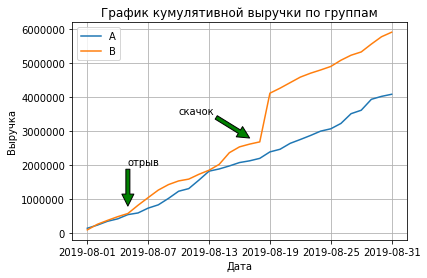

In [6]:
# выделим датафрейм для группы А с кумулятивным количеством заказов и кумулятивной выручкой по дням
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# аналогично для группы В
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# графики
fig, ax = plt.subplots()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g'))
plt.show()

Выручка в целом увеличивается в течение всего теста. 

Однако графики выручки группы В резко растет в двух точках. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

## График кумулятивного среднего чека по группам. <a id="cummeancost"></a>

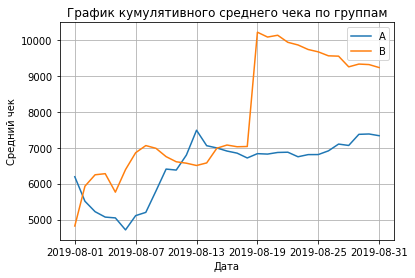

In [7]:
# средний чек = кумулятивная выручка/число заказов
fig, ax = plt.subplots()
plt.plot(cumulativeRevenueA['date'], 
         cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], 
         label='A')
plt.plot(cumulativeRevenueB['date'], 
         cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], 
         label='B')
plt.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.show()

Средний чек группы В резко возрастает в какой-то момент, а затем немного снижается. Это скорее будет говорить о резком увеличении числа заказов, так как пик не единичный. 

Средний чек группы А сначала падает, потом растет, но в итоге устанавливается на среднем уровне. 

### Вывод по графикам кумулятивной выручки и кумулятивного среднего чека по группам <a id="cumcostmean"></a>

Кумулятивная выручка: 
* В целом, увеличивается в течение всего теста.
* В группе В резко растет в двух точках. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

Кумулятивный средний чек: 
* В группе А сначала падает, потом растет, в итоге устанавливается на среднем уровне. 
* Средний чек группы В резко возрастает в какой-то момент, а затем немного снижается. Это скорее будет говорить о резком увеличении числа заказов, так как пик не единичный.


### График относительного изменения кумулятивного среднего чека группы B к группе A <a id="cumcostrel"></a>

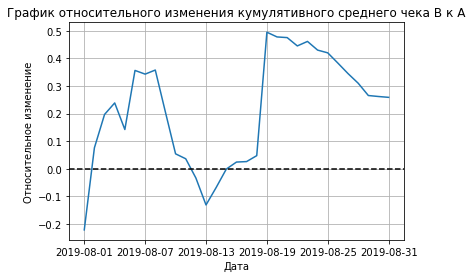

In [8]:
# чтобы узнать отношение, сначаоа собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])

# cтроим график с отношением 
fig, ax = plt.subplots()
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--') 
plt.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))
plt.title('График относительного изменения кумулятивного среднего чека В к А')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.show()

### Вывод по графику относительного изменения кумулятивного среднего чека группы B к группе A <a id="cumsum"></a>

Мы видим резкий спад на фоне общего понижения изменений, затем - резкий подъем и постепенное снижение изменений. Резкие перепады могут говорить о наличии выбросов, тогда как тенденция к снижению\увеличению может говорить о сезонности товаров и услуг. 

### График кумулятивной конверсии и ее относительного изменения по группам <a id="cumcon"></a>

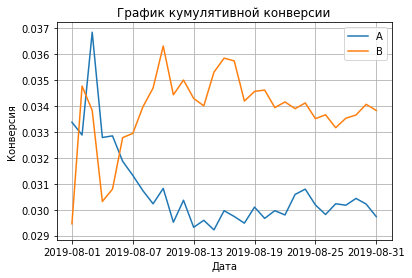

In [9]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# фильтруем данные по группам
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

fig, ax = plt.subplots()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))
plt.title('График кумулятивной конверсии')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.show()

В начале конверсия колебалась, но затем в группе В она стала больше. В группе А мы видим снижение конверсии. 

## График относительного изменения кумулятивной конверсии группы B к группе A. <a id="cumconrel"></a>

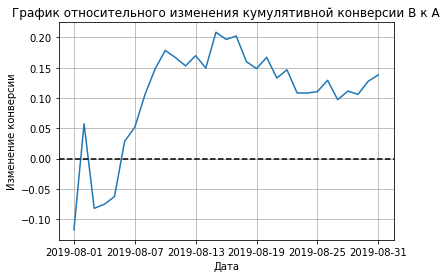

In [10]:
# чтобы посчитать относительное изменение, соедним данные по конверсии
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', 
                                                                           right_on='date', 
                                                                           how='left', 
                                                                           suffixes=['A', 'B'])

fig, ax = plt.subplots()
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))
plt.title('График относительного изменения кумулятивной конверсии В к А')
plt.xlabel('Дата')
plt.ylabel('Изменение конверсии')
plt.show()

### Вывод по графику кумулятивной конверсии и ее относительного изменения по группам <a id="cumconsum"></a>

Кумулятивная конверсия:
* В начале колеблется;
* В группе А происходит снижение, тогда как в группе В конверсия растет;
* В обоих группах конверсия стабилизировалась. 

Относительное изменение:
* В начале изменения конверсия колебались, затем возросли, затем мы наблюдаем небольшое снижение. Это может говорить о начале стабилизации конверсии. 

## Определение границы выбросов <a id="blowouts"></a>

### Точечный график количества заказов по пользователям, 95-й и 99-й перцентили. Выбор границы определения аномальных пользователей <a id="blowoutscount"></a>

Сгруппируем заказы по пользователям, построим график и выведем перцентили.

In [11]:
orders_count = orders.groupby('visitorId').agg({'transactionId':'count'}).reset_index()

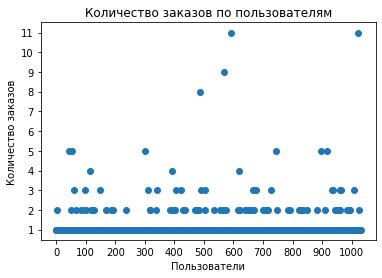

array([2., 4.])

In [12]:
fig, ax = plt.subplots()
x_values = pd.Series(range(0,len(orders_count['transactionId'])))
plt.scatter(x_values, orders_count['transactionId']) 
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

np.percentile(orders_count['transactionId'], [95, 99])

По графику видно, что чаще пользователи заказывают по 1 разу, больше 3 раз заказывают единицы.

По перцентилям - больше 4 раз заказывают не более 1% покупателей. 

То есть, выбираем границу - 4 и больше заказов. 

### Точечный график стоимостей заказов, 95-й и 99-й перцентили. Выбор границы определения аномальных заказов <a id="blowoutscost"></a>

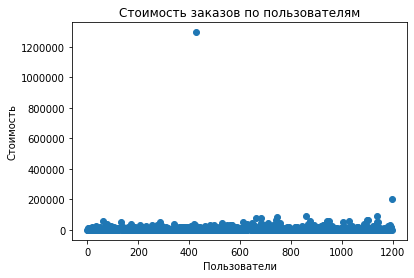

array([28000. , 58233.2])

In [13]:
fig, ax = plt.subplots()
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость')
plt.show()


np.percentile(orders['revenue'], [95, 99])

По графику видим только два крупных заказа. По перцентилям - больше чем на 28 тыс заказывают не более 5% пользователей, значит, выбираем границу аномальной стоимости заказов - 28 тыс. 



### Вывод: аномальная граница количества заказов и стоимости <a id="blowoutssum"></a>

Граница определения аномальных пользователей:
* 4 и больше заказа на пользователя.

Граница определения аномальных заказов:
* Стоимость заказа более 28000.

## Сравнение различий <a id="means"></a>

### Сравнение различий в конверсии и среднем чеке между группами по «сырым» данным <a id="meanscon"></a>

In [14]:
# подготовим необходимые данные. сначала посчитаем количестов посетителей в день в группах
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# кумулятивное количество посетителей
visitorsACummulative = (visitorsADaily.apply(
                                     lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                      .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
                       )
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']


visitorsBCummulative = (visitorsBDaily.apply(
                                     lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                      .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
                       )
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# сколько заказов было в группе каждый день и их общая сумма
ordersADaily = (orders[
                orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']
                        ].groupby('date', 
                                  as_index=False)
                         .agg({'transactionId' : pd.Series.nunique, 
                               'revenue' : 'sum'})
               )
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (orders[
                orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']
                        ].groupby('date', 
                                  as_index=False)
                         .agg({'transactionId' : pd.Series.nunique, 
                               'revenue' : 'sum'})
               )
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# кумулятивное количество заказов и их сумму
ordersACummulative = (ordersADaily.apply(
                                lambda x: ordersADaily[ordersADaily['date'] <= x['date']]
                                  .agg({'date' : 'max',
                                        'ordersPerDateA' : 'sum',
                                        'revenuePerDateA' : 'sum'}), axis=1)
                                  .sort_values(by=['date'])
                     )
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBCummulative = (ordersBDaily.apply(
                               lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
                                 .agg({'date' : 'max',
                                       'ordersPerDateB' : 'sum',
                                       'revenuePerDateB' : 'sum'}), axis=1)
                                 .sort_values(by=['date'])
                     )
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

# соединим все
data = (ordersADaily.merge(ordersBDaily, 
                          left_on='date', 
                          right_on='date', 
                          how='left')
                    .merge(ordersACummulative, 
                          left_on='date', 
                          right_on='date', 
                          how='left')
                    .merge(ordersBCummulative, 
                          left_on='date', 
                          right_on='date', 
                          how='left')
                    .merge(visitorsADaily, 
                          left_on='date', 
                          right_on='date', 
                          how='left')
                    .merge(visitorsBDaily, 
                          left_on='date', 
                          right_on='date', 
                          how='left')
                    .merge(visitorsACummulative, 
                          left_on='date', 
                          right_on='date', 
                          how='left')
                    .merge(visitorsBCummulative, 
                          left_on='date', 
                          right_on='date', 
                          how='left')
       )

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [15]:
# посчитаем количество заказов для пользователей в каждой группе
ordersByUsersA = (orders[orders['group']=='A'].groupby('visitorId', as_index=False)
                                              .agg({'transactionId' : pd.Series.nunique})
                 )
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (orders[orders['group']=='B'].groupby('visitorId', as_index=False)
                                              .agg({'transactionId' : pd.Series.nunique})
                 )
ordersByUsersB.columns = ['userId', 'orders'] 

# создадим две выборки. 
# в каждой будет количество заказов для пользователей и 0 у тех, кто ничего не заказал 
# (это обеспечивается вычитанием)

sampleA = (pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, 
                               index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                               name='orders')],
                     axis=0)
          )

sampleB = (pd.concat([ordersByUsersB['orders'],
                      pd.Series(0, 
                                index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                                name='orders')],
                     axis=0) 
          )

Чтобы посчитать конверсию в группах, надо поделить сумму заказов (сумма элементов в sample) на количество пользователей (длина sample). Для sample это будет средним арифметическим

Проверим, есть ли значимые статистические различия в конверсии в двух группах.

**Нулевая гипотеза:** Средние конверсии в двух группах значимо не различаются. 

**Обратная гипотеза:** Средние конверсии в группах значимо различаются. 

In [16]:
pvalue = (stats.mannwhitneyu(sampleA, sampleB,  alternative = 'two-sided')[1])
print('p-значение:', pvalue)
if (pvalue < 0.05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('')

print('Относительный прирост конверсии в группе В = ', 
      "{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

p-значение: 0.016792355056752608
Отвергаем нулевую гипотезу

Относительный прирост конверсии в группе В =  0.138


Делаем вывод - средние конверсии в группах значимо различаются. В группе В она выше на 13.8%. 

### Сравнение различий в среднем чеке заказа между группами по «сырым» данным. <a id="meanscost"></a>

Проверим, есть ли значимые статистические различия в конверсии в двух группах.

**Нулевая гипотеза:** Средние чеки заказов в двух группах значимо не различаются.

**Обратная гипотеза:** Средние чеки заказов в группах значимо различаются.

In [17]:
pvalue = (stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                             orders[orders['group']=='B']['revenue'],
                             alternative = 'two-sided')[1])
print('p-значение:', pvalue)
if (pvalue < 0.05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('')

print('Относительные различия в средних чеках в группе В = ', 
      orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1) 

p-значение: 0.7292909855432458
Не получилось отвергнуть нулевую гипотезу

Относительные различия в средних чеках в группе В =  0.2587136699126005


Так как нулевая гипотеза не отвергается, следовательно, различий в средних чеках групп нет. Мы видим, что средний чек в группе В выше, но это незначимое отличие. 

### Вывод - сравнение различий в конверсии и среднем чеке между группами по «сырым» данным <a id="meansrawsum"></a>

Конверсии в группах А и В:
* значимо различаются;
* В группе В конверсия выше на 13.8%.

Средние чеки в группах А и В:
* значимо не различаются;
* в группе В он выше на 25.9%.

### Сравнение различий в конверсии и среднем чеке между группами по «очищенным» данным <a id="meansclean"></a>

In [18]:
# создадим срезы пользователей с большим количеством заказов (больше 4)
# и с большой суммой заказов (больше 28 тыс)
# объединим их в одной таблице, удалим дубликаты
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], 
                                axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

abnormalUsers = (pd.concat([usersWithManyOrders, 
                           usersWithExpensiveOrders], 
                          axis = 0).drop_duplicates()
                                   .sort_values()
                )
display(abnormalUsers.head(5))
abnormalUsers.shape

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
dtype: int64

(59,)

Мы видим 59 человек со слишком большим количеством заказов или слишком дорогими заказами. 

Создадим новые выборки и сравним их.

**Нулевая гипотеза:** Средние конверсии в двух группах значимо не различаются.

**Обратная гипотеза:** Средние конверсии в группах значимо различаются.

In [19]:
sampleAFiltered = (pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, 
                                       index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                                       name='orders')],
                            axis=0)
                  )

sampleBFiltered = (pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, 
                                       index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                                       name='orders')],
                            axis=0) 
                  )

pvalue = (stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1])
print('p-значение:', pvalue)
if (pvalue < 0.05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('')

print('Относительный прирост конверсии в группе В = ', 
      "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-значение: 0.018457083488550168
Отвергаем нулевую гипотезу

Относительный прирост конверсии в группе В =  0.145


Результаты похожи на результаты по сырым данным.

По очищенным выборкам мы видим значимые различия между конверсиями, в группе В конверсия больше на 14.5%.

### Сравнение в среднем чеке заказа между группами по «очищенным» данным. 

**Нулевая гипотеза:** Средние чеки заказов в двух группах значимо не отличаются.  

**Обратная гипотеза:** Средние чеки заказов в группах значимо отличаются.

In [20]:
pvalue = (stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A',
                                                  np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                            orders[np.logical_and(orders['group']=='B',
                                                  np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                            alternative='two-sided')[1]
         )
print('p-значение:', pvalue)
if (pvalue < 0.05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('')
print('Относительные различия в средних чеках в группе В = ',
      "{0:.3f}".format(orders[np.logical_and(orders['group']=='B',
                                             np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
                       orders[np.logical_and(orders['group']=='A',
                                             np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-значение: 0.9612742488180921
Не получилось отвергнуть нулевую гипотезу

Относительные различия в средних чеках в группе В =  -0.014


Без выбросов результаты не изменились, значимых различий нет, но средний чек в группе В стал ниже на 1.4%. 

### Вывод - сравнение различий в конверсии и среднем чеке между группами по «очищенным» данным <a id="meanscleansum"></a>

Конверсии в группах А и В:
* значимые различия есть;
* в группе В выше на 14.5%.

Средний чек в группах А и В:
* значимо не отличается;
* в группе В ниже на 1.4%.

# Общий вывод <a id="bigsum"></a>

**1. Приоритизация гипотез.**

После приоритизации по фреймворку ICE наиболее важными оказались гипотезы "Запустить акцию, дающую скидку на товар в день рождения", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". 

По RICE - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". 

В целом, заказчику можно посоветовать точно обратить внимание на гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", поскольку они в приоритете при использовании обоих фреймворков. 

Гипотезы "Запустить акцию, дающую скидку на товар в день рождения" и "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" находятся в топ-5 важных гипотез, поэтому тоже могут быть проверены при наличии ресурсов. 

**2. Анализ А/В-теста.**

**2.1 Построение и анализ графиков.**

Кумулятивная выручка:
* В целом, увеличивается в течение всего теста.
* В группе В резко растет в двух точках. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

Кумулятивный средний чек:
* В группе А сначала падает, потом растет, в итоге устанавливается на среднем уровне.
* Средний чек группы В резко возрастает в какой-то момент, а затем немного снижается. Это скорее будет говорить о резком увеличении числа заказов, так как пик не единичный.

Относительные изменения кумулятивного среднего чека: 
* Мы видим резкий спад на фоне общего понижения изменений, затем - резкий подъем и постепенное снижение изменений. Резкие перепады могут говорить о наличии выбросов, тогда как тенденция к снижению\увеличению может говорить о сезонности товаров и услуг.

Кумулятивная конверсия:
* В начале колеблется;
* В группе А происходит снижение, тогда как в группе В конверсия растет;
* К концу обоих группах конверсия стабилизировалась.

Относительное изменение кумулятивной конверсии:
* В начале изменения конверсия колебались, затем возросли, затем мы наблюдаем небольшое снижение. Это может говорить о начале стабилизации конверсии.

**2.2 Определение границы выбросов.**
* Граница определения аномальных пользователей: 4 и больше заказа на пользователя.
* Граница определения аномальных заказов: Стоимость заказа более 28000.

**2.3 Сравнений различий.**

По "сырым" данным:
* Конверсии в группах А и В: значимо различаются, в группе В конверсия выше на 13.8%.
* Средние чеки в группах А и В: значимо не различаются, в группе В он выше на 25.9%.

По "очищенным" данным:
* Конверсии в группах А и В: значимо различаются, в группе В выше на 14.5%.
* Средние чеки в группах А и В: значимо не отличаются; в группе В ниже на 1.4%.

**3. Выводы по результатам А/В-теста.**

Конверсия стабилизировалась в течение теста, в группе В она выше. Однозначных выводов про средний чек сделать нельзя, мы видим колебания, в конце возможно мы видим тенденцию к стабилизации. 

Значимые отличия есть по конверсии, в группе В конверсия выше. По средним чекам значимых отличий нет. 

То есть, делаем вывод, что А/В-тест можно останавливать, фиксируем победу группы В по показателям конверсии. 
